# Principles of Data Visualization

This is the **third** in a series of hands-on tutorials designed to teach neural data analysis. No programming background is necessary, but a familiarity with basic Python is helpful. This tutorial teaches basic principles of data visualization and how to construct figures using common Python libraries (e.g., `Matplotlib`). The tutorial is implemented in a Google Colab notebook, so no local Python installation is required; see the `README.md` file for setup instructions.

### Objectives:
1. Recognize the importance of data visualization and science communication
2. Understand the basic elements of a figure (e.g., axes, legend)
3. Learn Rougier's "Ten Rules for Scientific Data Visualization"
4. Review common libraries for data visualization in python (`Matplotlib`, `Seaborn`)
5. **DIY**: Practice creating high-quality figures (and figure elements) using sample data

----
> Justin Campbell   
> justin.campbell@hsc.utah.edu  
> Version: 5-26-24  
>> Much of this notebook draws from Nicolas Rougier's excellent book on the subject, which is available for free [here](https://inria.hal.science/hal-03427242/document).  
(Nicolas Rougier. Scientific Visualization: Python + Matplotlib. Nicolas P. Rougier. 2021, 978-2- 9579901-0-8. hal-03427242).

## Setup Notebook
Run this cell to install/import the libraries and packages used throughout.

In [65]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Improve figure quality
%matplotlib inline
%config InlineBackend.figure_format='retina'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
# Default Matplotlib settings
plt.rcParams['figure.figsize'] = (3, 3)

## 1. The Art of Science Communication

<img src='https://drive.google.com/uc?id=1q8N9Gk74K45PELr5Jcg2khj9SYvZrp6u' width="750">


In science, figures tell much of the story about how a study was designed, how the data look, what the results indicate, and how new insights can be interpreted in the context of existing models. Many people, myself included, have a tendency to skim through the text in published academic papers and focus instead on the figures for this reason. A well-designed figure makes your message clear, and facilitates all other aspects of communicating the science.

On the flip side, when figures are poorly designed, they prime the reader (whether consciously or subconsciously) to form negative opinions about the work－for example, a mislableled figure with multiple spelling errors suggests that the authors lack an appropriate attention to detail, one which might permeate other aspects of the work. Put differently, it is much better to be remembered for your strengths rather than your weaknesses (as the above portraits illustrate).

No amount of time spent giving your figures a facelift is a substitute for conducting well-designed, rigorous research that results in clean data. Garbage in, will inevitably lead to garbage out, no matter how pleasant the color palette. Although much of how data are visualized is a matter of personal preference (and existing conventions in your field), there are certain design principles that will almost certainly help you to better convey your message.  

<br>

#### Information Density

$$
\text{Density}_{\text{I}} = \frac{\text{I}_{\text{Helpful}} - \text{I}_{\text{Unhelpful}}}{\text{Volume}_{\text{I}}}
$$

<br>

To be perfectly clear, I've completely made up this equation (but the mathematization does suggest credibility). That being said, the formula captures an essential idea that we'll come back to throughout this notebook: **maximizing the information conveyed by a figure is a function of how much helpful information there is relative to the total volume of information/content provided**. Certain practices universally add helpful information (see the "Ten Simple Rules" outlined below).

A figure with high information density speaks for itself, is intuitive, and can be understood with little, if any, added explanation. In contrast, a figure with low information density might be so confusing as to completely confound interpretation, or project the wrong message.


## 2. How to Make Better Figures

### 2.1 Ten Simple Rules for Scientific Data Visualization

Below are a set of ten rules adapted from [Rougier et al. 2014](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833) intended to improve figure design and avoid common pitfalls.



#### 1. Know Your Audience
- Is this a figure for a scientific publication, a data update with your PI, or to show your grandparents what you do? It's important to think about who the intended audience is and tailor the content accordingly. This is particularly true when the audience contains people outside of your field of research; bar plots are universal, but more niche things like spectrograms or tSNE plots might require some extra thought.

<br>

#### 2. Identify Your Message
- A figure is meant to express an idea, or a collection of ideas. What is the prupose of including this particular figure? What are you hoping to convey? Once you've clarified the message, the subsequent decisions regarding style and visualization are much more straightforward.

<br>

#### 3. Adapt the Figure to Your Medium
- Will this figure be used in a presentation for a large audience, an open-access electronic paper, or printed black and white as a conference proceeding? In many respects, the medium shapes how the content should be presented. As a general rule, it's a good idea to use large font text in presentations (viewed from a distance) and use high-contrast colors which can still be disambiguated if black and white.

<br>

#### 4. Captions Are Not Optional
- Don't expect to rely on your ability to verbally explain each aspect of the figure. Remember, great figures speak for themselves. Always include captions that contextualize the work and the major takeaways. Doing so makes it easier for others to share your figures and ideas.

<br>

#### 5. Do Not Trust the Defaults
- Any plotting tool you use has some default settings. However, default in no way implies best. Since the defaults are intended for use with every plot, they are rarely the best for any specific application. Take the time to enhance your figure by thinking through how different elements can be tuned to best to convey your message.

<br>

#### 6. Use Color Effectively
- Appropriate color selection is absolutely essential for creating great figures. The use of specific colors, or color palettes, has subtle implications－if you're plotting your data on a cool-warm (blue-red) palette, this suggests that values transition fluidly from low to high, with some neutral medium. Consider the properties of the data you are trying to visualize and the goals of the analysis. Avoid changing the colors used for visualizing the same groups across different figures. As a general rule, avoid problematic color pairings (e.g., 5-8% of men, and 0.5-1% of females have red-green color blindness).

<br>

#### 7. Do Not Mislead the Reader
- The major distinction between scientific data visualization and other artistic media are that the content needs to be depicted as objectively as possible. Arbitrarily changing the scale of the data to visually enhance/decrease a difference is misleading. As a general rule, you should hold specific elements constant (x- and y-axis limits) across plots being contrasted to facilitate accurate comparison.

<br>

#### 8. Avoid "Chartjunk"
- "Chartjunk" refers to all of the unhelpful or confusing elements of a figure that distract from the overall message. It's best to avoid unnecessary clutter (e.g., gridlines), unconventional symbols (e.g., diamond markers on a scatterplot) unless you have a compelling reason for doing so. Remove unnecessary backgrounds, redundant labels, etc to maximize information density!

<br>

#### 9. Message Trumps Beauty
- A well-designed figure helps enhance/convey your message, but it's not a substitute for the message itself. Complex, visually-appealing figures are not inherently better than simpler alternatives. In fact, the opposite is often true.

<br>

#### 10. Get the Right Tool(s)
- Thankfully, you don't need to reinvent the wheel to design great figures. There are many existing tools which make figure creation and editing easy. We'll review some of the coding libraries below, but I highly recommed other resources like Adobe Illustrator and Biorender (icon library) which can help bring everything together and make your work look professional.

### 2.2 General Advice

#### 1. Export High-Resolution (vectorized) Figures for Publication
- Don't go through all that work to make a beautiful figure only for the quality to be reduced when you export! When possible, use *vectorized* graphic formats (e.g., .pdf, .svg) which don't become blurry when zooming in. Additionally, increase the *dots per inch (DPI)* during export to enhance resolution  (more isn't always better though－doing so will increase file size).  

  <img src='https://drive.google.com/uc?id=1x1rCRcgjhmDpemaIhzduNqCYXUwjiK_i' width="300">  <img src='https://drive.google.com/uc?id=1S1HON4wK94g2eAIx3k3pzziysAKVtejM' width="350">  
<br>

#### 2. Write Visualization Code That is Shareable, Reusable, & Versatile
- Good data visualization code is reproducible. Great data visualization code is well-documented with comments and a docstring, can be used in different contexts, can be run on other computers, and is easy to follow.

<br>

#### 3. Leverage Existing Knowledge (e.g., ChatGPT)
- Don't get bogged down in the technical implementation of how to create your figures. There are lots of excellent code snippets available online (e.g., Stack Overflow, data science blogs), and with a well-crafted prompt, tools like ChatGPT and Github Copilot can usually suggest code for what you need.

## 3. Fundamentals of Figure Design

### 3.1 Anatomy of a Figure

<img src='https://drive.google.com/uc?id=1ptMkq3Mfou6qPf9dd6sO4yzSeQqYmv8E' width="500">

This image highlights the different parts of a figure, all of which can be manipulated using code. By analogy, the *figure* is essentially the "wall" on which your art will be displayed, and the *axis/axes* are the framed portraits. Thus, you would need to modify the size of your figure to display more plots, and you would need to change the axis elements in order to change the plot itself.


**At a minimum, always label your x- and y-axes**. Everything else is more a matter of personal preference－want to force the plot to show *ticks* at specific locations or remove the framing around figure? The sky is the limit. That being said, keep in mind the notion of *information density*: too many labels or plot elements can add clutter that detracts from the data itself.

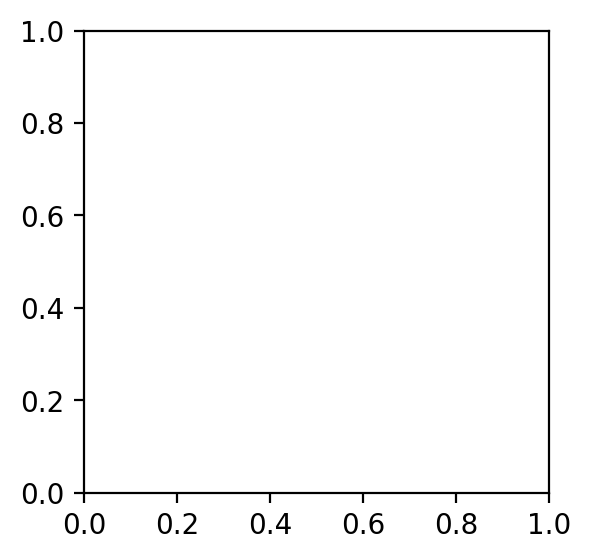

In [67]:
# Basic skeleton
fig, ax = plt.subplots(figsize = (3,3)) # create a 4"x4" blank figure, add an axis

# Practice adding other elements:
# YOUR CODE HERE

# Display
plt.show()

### 3.2 Figure Size & Layout
In this section, we'll play around with the overall construction of the figure by manipulating its size and layout.

Often in scientific publications, a figure will have multiple plots or panels representing different data; I like to think of each figure as having an overall message, with each subplot contributing to part of that story. These designs can be constructed post-hoc using tools like Adobe Illustrator, but there are some tangible benefits to doing as much as you can with code:



1. Maximizes control: making edits to the figure is easier to do when everything is in one place and not spread across multiple scripts or files
2. Reproducibility: it's easier to share and reproduce figures when recreating what you had is as simple as re-running a block of code
3. Consistency: Ensures that figure elements don't vary across subplots (e.g., font style and size may change if combined with other figures)

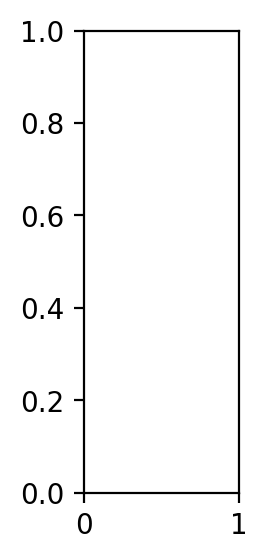

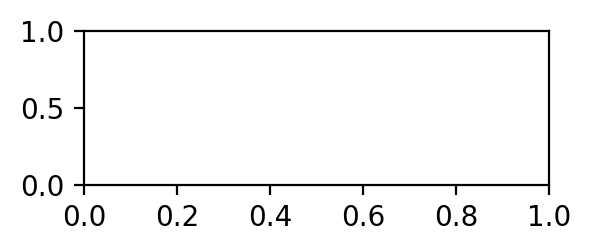

In [68]:
# Figures don't need to be square
fig, ax = plt.subplots(figsize=(1,3)) # 1" x 3"
fig, ax = plt.subplots(figsize=(3,1)) # 3" x 1"
plt.show()

Each of these plots are separate figures, but what if we wanted to create multiple plots on the same figure?

Below, we'll learn about two approaches to modifying the figure layout to create multi-panel figures: `subplots()` and, the more powerful alternative, `GridSpec()`.

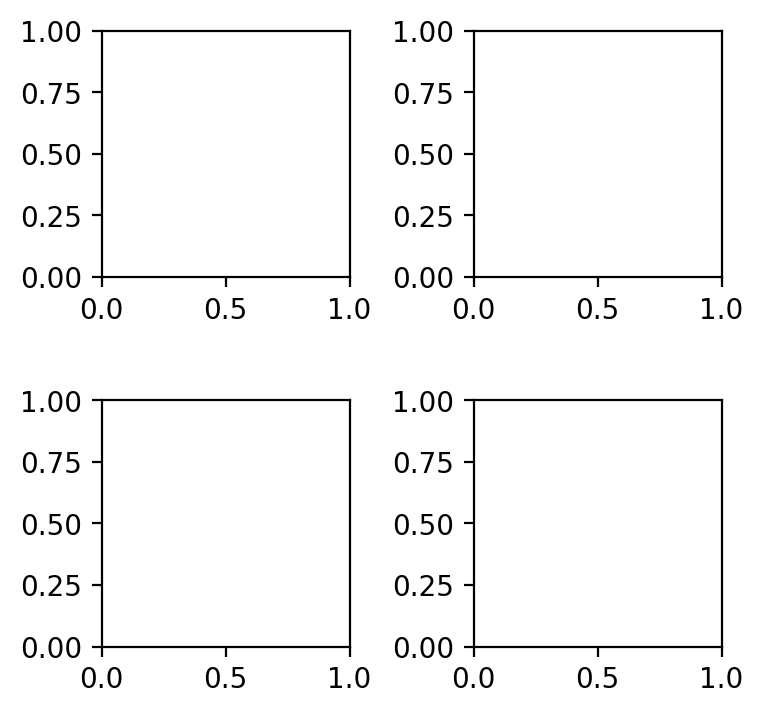

In [69]:
# Subplots() is easy to use if panels are the same size
fig, axes = plt.subplots(2, 2, figsize=(4,4)) # same syntax as above, but we've specified the nrows (2) and ncols (2)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5) # can also adjust the height and width between axes to enhance separation
plt.show()

You may have noticed that we used the same `subplots()` function to create multi-panel figures as we did to create a figure with just one axis. This is because the default behavior of `subplots()` is to set the number of rows/cols to 1; it's possible to create a blank figure first and then add a single axis, but that's just extra code, so this approach has become the convention.

What if you didn't want perfectly square axes? In this case, it's easiest to leverage the functionality of `GridSpec()` (abbreviated `gs`), which simplifies this process.

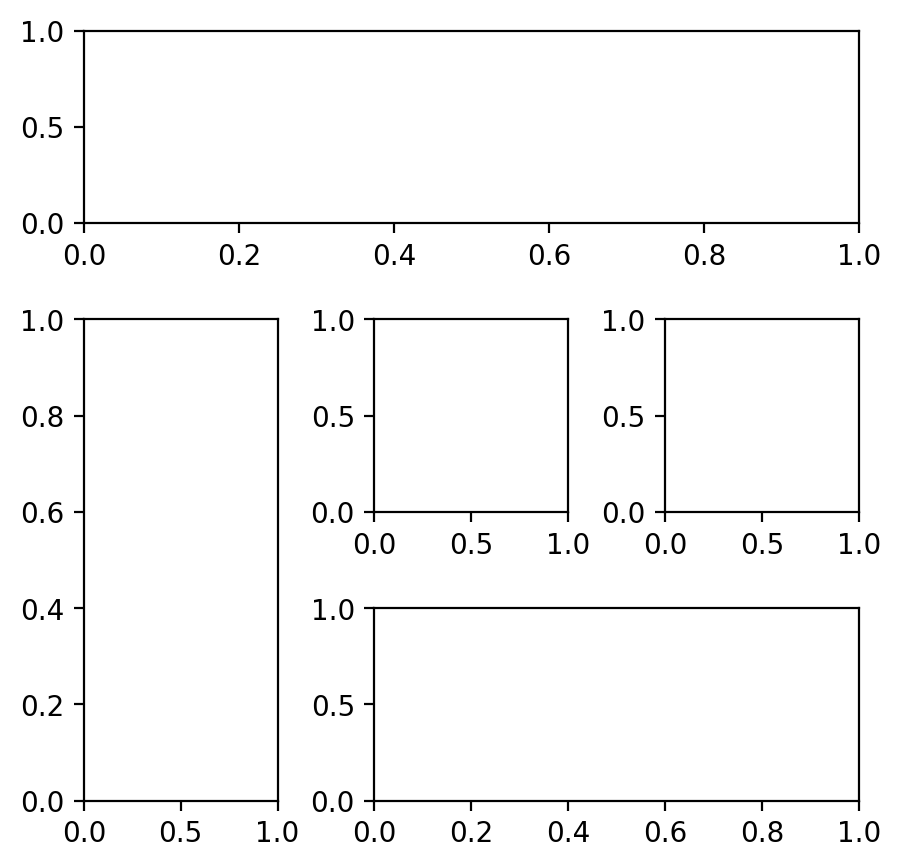

In [70]:
from matplotlib.gridspec import GridSpec as gs

# Using GridSpec
fig = plt.figure(figsize = (5,5))
gs = GridSpec(3,3, hspace = 0.5, wspace = 0.5) # define the grid space as 3x3

# Create axes by specifying the space each should occupy
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1:,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[1,2])
ax5 = fig.add_subplot(gs[2,1:])

# Can you identify the axes from the code? Try:
# 1. Creating a plot on the center panel (use x,y)
# 2. Assigning a ylabel to the tall/skinny axis
# 3. Add a title to the top axis

# Data
x = np.arange(1000)
y = np.sin(2*np.pi*2 * (x/1000))

# YOUR CODE HERE


# Display
plt.show()

### 3.3 Color & Color Palettes

Picking the colors in your figure is more than simple aesthetic preference. The colors you use naturally suggest specific qualities of the data. For example, the use of very distinct hues suggests a discontinuity (groupings), whereas a perceptually-uniform palette that varies by luminance suggests continuity. To easily visualize different color palettes, we can use the `Seaborn` function `palplot()`.

*Qualitative* color palettes are preferred for distinguishing separate categories:

Set1


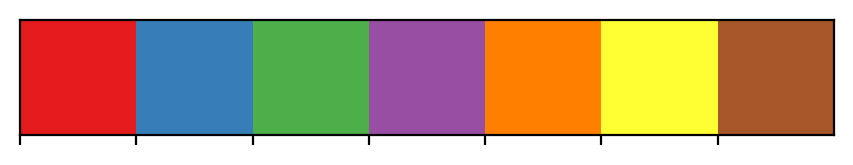

Set2


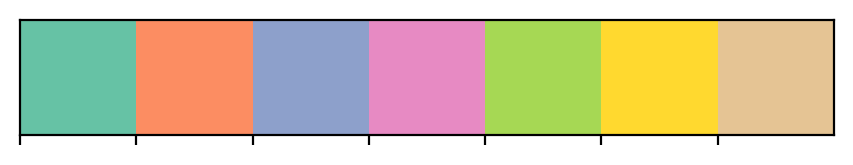

In [71]:
print('Set1')
sns.palplot(sns.color_palette('Set1', 7), 0.75)
plt.show()

print('Set2')
sns.palplot(sns.color_palette('Set2', 7), 0.75)
plt.show()

*Sequential* (perceptually-uniform) color palettes are preferred for representing numerical change (think low vs. high):

Plasma


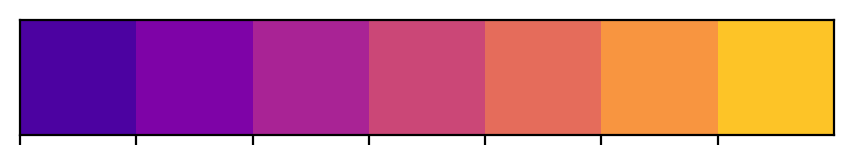

Viridis


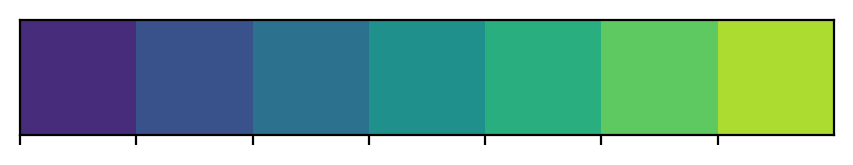

In [72]:
print('Plasma')
sns.palplot(sns.color_palette('plasma', 7), 0.75)
plt.show()

print('Viridis')
sns.palplot(sns.color_palette('viridis', 7), 0.75)
plt.show()

*Diverging* palettes are used to accentuate extreme values while deemphasizing values at the midpoint (think hot vs. cold):

Coolwarm


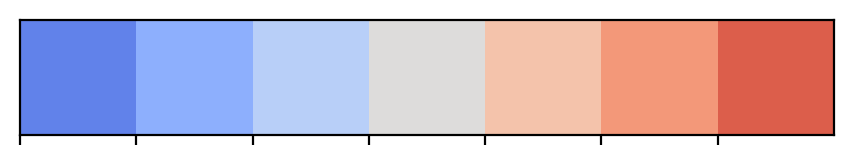

Spectral


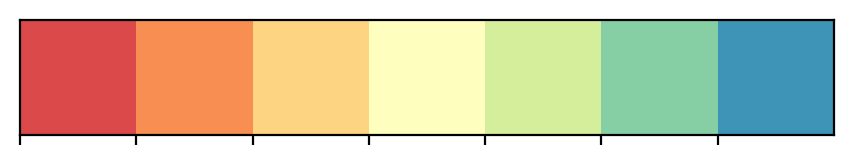

In [73]:
print('Coolwarm')
sns.palplot(sns.color_palette('coolwarm', 7), 0.75)
plt.show()

print('Spectral')
sns.palplot(sns.color_palette('Spectral', 7), 0.75)
plt.show()

*Circular* palettes are made of evenly spaced colors that represent a continuous, cyclical spectrum (think oscillatory phase or seasons):

HLS vs. Twilight


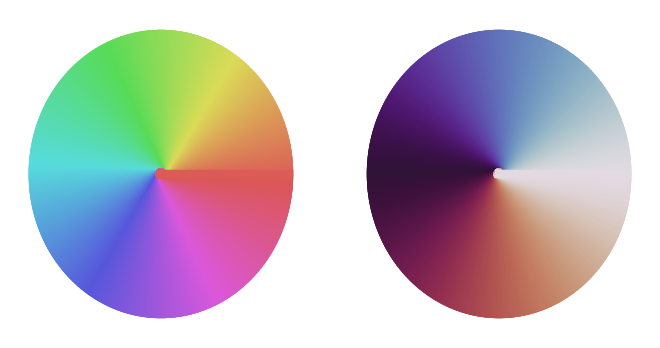

In [74]:
print('HLS vs. Twilight')
f = plt.figure(figsize=(4, 2))
theta = np.linspace(0, 2 * np.pi, 360)
x = np.cos(theta)
y = np.sin(theta)

with sns.color_palette('hls', 360):
    ax = f.add_subplot(121)
    ax.plot([np.zeros_like(x), x], [np.zeros_like(y), y], lw=3)
    ax.set_axis_off()

with sns.color_palette('twilight', 360):
    ax = f.add_subplot(122)
    ax.plot([np.zeros_like(x), x], [np.zeros_like(y), y], lw=3)
    ax.set_axis_off()

Most stock palettes also have a *reversed* option (`_r`), which inverts the order:

Flare


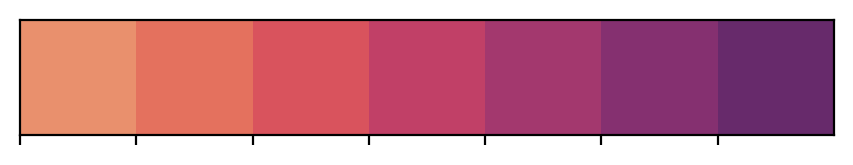

Flare Reversed


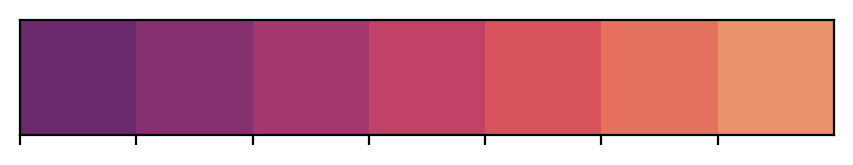

In [75]:
print('Flare')
sns.palplot(sns.color_palette('flare', 7), 0.75)
plt.show()

print('Flare Reversed')
sns.palplot(sns.color_palette('flare_r', 7), 0.75)
plt.show()

This is by no means an exhaustive list, there are many more pre-defined palettes available for easy use. You can also create your own palette by manually specifying the colors you're interested in. Here, colors are defined using hex codes, although you can also provide the color information using the RGB code (see this [website](https://www.color-hex.com/) to lookup the hex codes for any color)

Custom


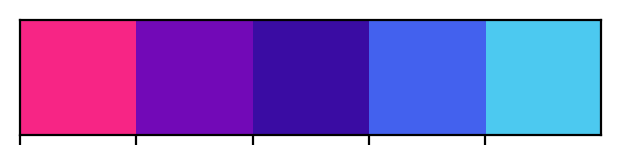

In [76]:
print('Custom')
custom_pal = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"] # 5 colors
sns.palplot(custom_pal, 0.75)
plt.show()

Setting palettes is done one of two ways (depending on the type of plot being used):
1. By assigning color(s) from a given palette to each plot element
2. By assigning a colormap (palette) to the plot, which is then applied implicitly

The primary distinction is that in the former, you are specifying a single color for each element (see `color = pal[ii]`), whereas in the latter you are assigning a palette (`cmap = 'flare'`).

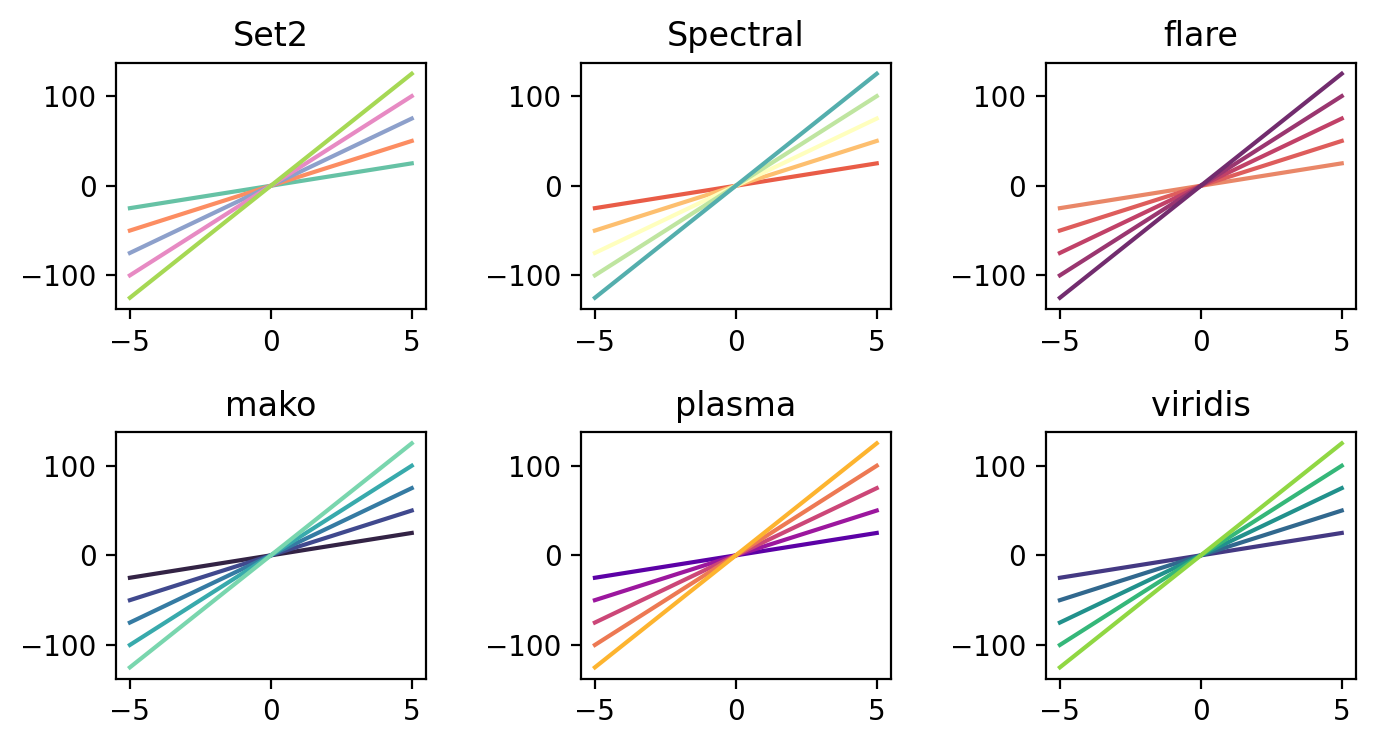

In [77]:
# Assigning a specific color to each line

# Data
x = np.linspace(-5, 5)
slopes = np.arange(5, 30, 5)

# Figure anatomy
palettes = ['Set2', 'Spectral', 'flare', 'mako', 'plasma', 'viridis']
fig, axes = plt.subplots(2, 3, figsize = (8, 4))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

# Plotting
for i, ax in enumerate(axes.flatten()):
  pal = sns.color_palette(palettes[i], len(slopes)) # get palette from list, 1 color for each line
  ax.set_title(palettes[i])
  for ii in range(len(slopes)):
    ax.plot(x, slopes[ii] * x, color = pal[ii]) # index color in palette to assign

plt.show()

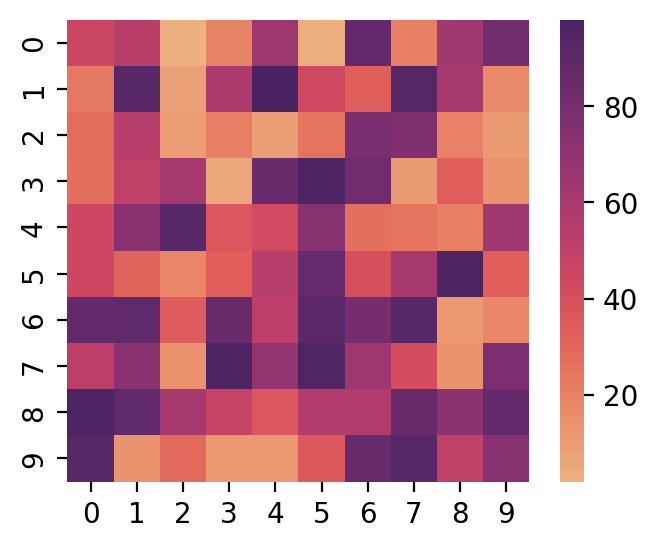

In [78]:
# Assigning a colormap to a plot

# Data
data = np.random.randint(low = 1, high = 100, size = (10, 10))

# Figure anatomy
fig, axes = plt.subplots(figsize = (4, 3))

# Plotting
sns.heatmap(data, cmap = 'flare', square = True) # no need to create palette in advance, just tell the function which to use!
plt.show()

**If you are creating several figures for a single publication, having a cohesive visual theme can tie it all together**. Where possible, use the same palette throughout the publication to avoid the circus-like apparance that results from different colors in each plot and/or figure. Certain elements can be adapted within a given palette to suit different types of data:

Mako: Continuous Data


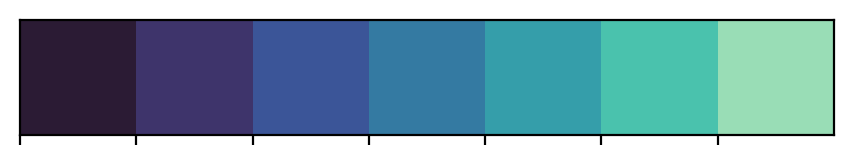

Mako: Categorical Data


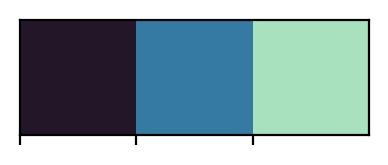

In [79]:
print('Mako: Continuous Data')
sns.palplot(sns.color_palette('mako', 7), 0.75)
plt.show()

print('Mako: Categorical Data')
# color separation across spectrum is increased to enhance visual contrast
mako_categorical = [sns.color_palette('mako', 9)[0], sns.color_palette('mako', 9)[4], sns.color_palette('mako', 9)[-1]]
sns.palplot(mako_categorical, 0.75)
plt.show()

## 4. Data Visulization in Python

### 4.1 Python Plotting Libraries: `Matplotlib` & `Seaborn`
- [`Matplotlib`](https://matplotlib.org/stable/) is the most common library used for data visualization in Python. The structure/syntax closely resembles what is used for `MATLAB`. The library contains the `pyplot` module (abbreviated `plt`), which contains a broad collection of plotting functions.

- [`Seaborn`](https://seaborn.pydata.org/) is a high-level interface based on the `Matplotlib` library that, simply put, tends to make really nice-looking figures (with minimal effort). The library also includes some more complex plotting functions that aren't included in other libraries and adds more information (e.g., axis labels) as a default.

I tend to use a combination of the two, depending on how my data is structured and what I'm trying to create. If you're working with a `pandas.DataFrame` (structured like an Excel spreadsheet), `Seaborn` is especially helpful. Alternatively, if you're working primarily with a `numpy.array`, `Matplotlib` is often the most straightforward. Below, we'll load a sample dataset and practice creating a bar plot using the different methods.

In [80]:
# Importing the two libraries is easy (we've already done this above):
import matplotlib.pyplot as plt
import seaborn as sns

# Load sample dataset
df = sns.load_dataset('titanic')
df.head() # preview first 5 rows

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


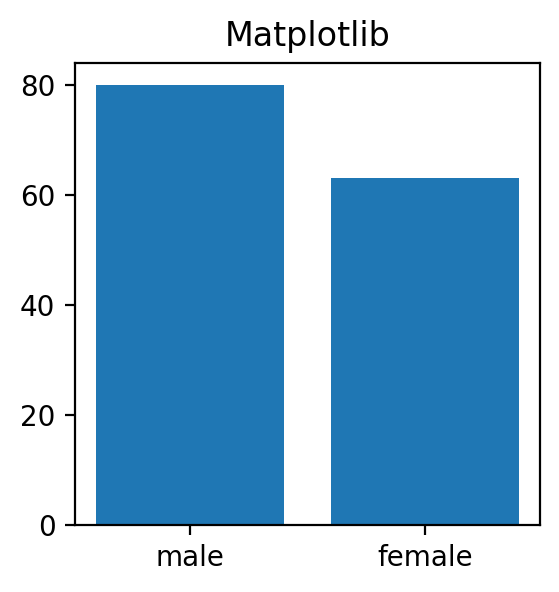

In [ ]:
# Simple barplot in Matplotlib
x = df['sex']
y = df['age']
plt.bar(x, y) # specify x and y
plt.title('Matplotlib')
plt.show()

# Simple barplot in Seaborn
sns.barplot(data = df, x = 'sex', y = 'age') # specify dataframe, and columns to use as x and y
plt.title('Seaborn')
plt.show()

# Seaborn has extra functionality for quick parsing of DataFrames (e.g., changing hue by value in 'survived')
sns.barplot(data = df, x = 'sex', y = 'age', hue = 'survived')
plt.title('Seaborn+')
plt.show()

The code structure is very similar, but there are some inherent stylistic differences in the output. For example, `Seaborn` will automatically assign axis and tick labels based on the DataFrame column names, add errorbars to show the CI, and add include a legend when appropriate.

### 4.2 Leveraging Online Documentation to Make Figures

An added benefit to using existing resources like `Matplotlib` or `Seaborn` is that the codebase is well-maintained and well-documented. **This is rarely the case with re-used code that is developed in lab**. Below I've pasted screenshots from the online documentation for the [`matplotlib.axes.Axes.scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter) function to create a scatterplot from two data arrays: `x` and `y`.

> Although the function is defined as `matplotlib.axes.Axes.scatter()`, you can call the function just using the abbreviated form `ax.scatter()` (explicit) or `plt.scatter()` (implicit).

<img src='https://drive.google.com/uc?id=1-h6J-4sCJPPNSt-xUTZzJKGkerFjDXys' width="500">
<img src='https://drive.google.com/uc?id=1OLSMDzyOqzL12sftY1rcAG_fsUzma0Xn' width="325">

In [ ]:
# Try using the above documentation to reproduce the example scatterplot,
# then add missing figure elements (e.g., axes labels)

# YOUR CODE HERE



### 4.3 Choosing the Right Plot for the Data
Some plots are inherently better-suited for representing specific types of data. You wouldn't, for example, use a pie chart to visualize neuronal firing rates over time or use a scatterplot to count the number of spikes in a 1s period.  

Broadly speaking, most plots fall within one of four categories:
- **Relational**: highlight interaction and relationship between features (think scatterplots and regression)
- **Distribution**: characterize distribution/spread of features (think histograms and KDEs)
- **Categorical**: contrasts multiple distinct features or groupings (think barplots and boxplots)
- **Compositional**: depicts how features contribute to parts of a whole (think pie charts and stackplots)

This is, of course, not an exhaustive list. Many other plots don't neatly fall into one of these categories (e.g., spectrograms, heatmaps). Others can represent data multiple different ways－barplots can reveal proportions within groups (compositional) and contrast differences between groups (categorical). Nonetheless, we can use this framework for thinking about how we might visualize different types of data.

In [ ]:
# Load new dataset
df = sns.load_dataset('penguins')
df.head()

This is a dataset which tracked physical properties of penguins found on the Palmer Archipelago in Antarctica. By previewing the data above, we can see multiple different data types in the columns:
- `species` (categorical)
- `island` (categorical)
- `bill_length_mm` (continuous)
- `bill_depth_mm` (continuous)
- `flipper_length_mm` (continuous)
- `body_mass_g` (continuous)
- `sex` (categorical)

We'll use different plots to answer the following:
1. Is there a relationship between the size of antarctic penguins and their flipper length?
2. What are the most common bill lengths among antarctic penguins?
3. Is there a difference in the proportion of male/female antarctic penguins across different islands in the archipelago?
4. Which species of antarctic penguin is most prevalent?

In [ ]:
# Relational
sns.regplot(data = df, x = 'flipper_length_mm', y = 'body_mass_g', scatter_kws = {'s': 5})
plt.title('Relational Plot:\nRegression')
plt.show()

In [ ]:
# Distribution
sns.histplot(data = df, x = 'bill_length_mm') # histogram
plt.title('Distribution Plot:\nHistogram')
plt.show()

In [ ]:
# Categorical
sns.countplot(data = df, x = 'island', hue = 'sex')
plt.title('Categorical Plot:\nBar Counts')
plt.show()

In [ ]:
# Compositional
species_counts = df['species'].value_counts()
species_labels = df['species'].value_counts().index
plt.pie(x = species_counts, labels = species_labels, autopct = '%.1f%%')
plt.title('Compositional Plot:\nPie Chart')
plt.show()

### 4.4 Putting it All Together: Layering Plot Elements to Construct a Figure
Below, we'll step through the entire process of constructing a figure, to show the full implementation of what we've discussed. As you'll see, the actual code for plotting is fairly straightforward (1-2 lines), but tuning each of the figure elements takes some extra work.

Additionally, you'll see that I've manipulated the figure elements in a slightly different way than what we've used previously (e.g., `plt.xlabel()` vs. `ax.set_xlabel()`). Both approaches work－the former intuits which element you're trying to modify, whereas the latter is more explicit (and better to use when there are multiple axes).

In [ ]:
# 1. Organize data
x = np.linspace(-5, 5) # create an array of x values -5 to 5
slopes = np.arange(1, 10.5, 0.5) # create an array of slopes 1 to 10

# 2. Figure anatomy
fig, ax = plt.subplots(figsize = (4, 4)) # figure w/ 1 axis, 4"x4"
palette = sns.color_palette('Spectral_r', len(slopes)) # use Spectral-reverse palette w/ different color for each slope

# 3. Plotting
# loop through different slopes, plot each line on same figure
for i, m in enumerate(slopes):
  color = palette[i] # grab the color for each line
  plt.plot(x, (m * x), color = color, lw = 2, label = '$Y = %ix + b$' %int(m))

# 4. Add figure elements
plt.title('Demo Figure', fontsize = 'xx-large') # add title
plt.axhline(0, color = 'k', lw = 1) # add horizontal line at y = 0
plt.axvline(0, color = 'k', lw = 1) # add vertical line at x = 0
plt.xlabel('X Values', fontsize = 'large') # add x label
plt.ylabel('Y Values', fontsize = 'large') # add y label
plt.xticks(np.arange(-4, 4+1, 2)) # set xticks
plt.yticks(np.arange(-20, 20+1, 10)) # set y ticks
plt.xlim(-4,4) # set x limits
plt.ylim(-20,20) # set y limits
sns.despine(top = True, right = True) # remove upper/right spines
handles, labels = ax.get_legend_handles_labels() # get existing handles/labels
plt.legend(handles = handles[::4], labels = labels[::4], bbox_to_anchor = (1.1,0.975)) # add every 4th slope to legend

# 5. Display and export
plt.show() # show figure in notebook
# plt.savefig('MYPATHTOFIGURE/Figure.pdf', dpi = 500) # export as .pdf

### 4.5 Making Plotting `Fun(ctions)`
If you need to make the same plot over and over again, or want to easily share code with others, it's worth wrapping the code into a plotting *function*. You're already familiar with the idea of plotting functions, as we've used them throughout this notebook (e.g., `plt.scatter()`, `plt.bar()`, `plt.plot()`). Doing so allows you to hold some aspects of the figure constant (e.g., figure elements, colors), while swapping out the data. Below, I've defined a function called `my_plot()`, which we'll call on on some simulated data.
> Note that the function code begins with a description of what the function does, what it takes as inputs, and what it returns as an output. This is known as a *docstring*, and including them in your functions is a great coding practice.

In [ ]:
def my_plot(x, y, s, show_median = False):
  '''
  This function contains code to plot a scatterplot given two variables (x, y).

  Inputs:
  - x (np.array): data values to plot on x-axis
  - y (np.array): data values to plot on y-axis
  - s (np.array): size of value at position x,y
  - show_median (bool): display medians

  Outputs:
  - Print median of x and y (optional)
  - Display 2"x2" scatterplot of x vs. y
  '''

  # Figure anatomy
  fig, ax = plt.subplots(figsize = (2, 2))

  # Plotting
  plt.scatter(x, y, s)

  # Figure elements
  sns.despine(top = True, right = True)
  plt.xticks([min(x), max(x)])
  plt.yticks([min(y), max(y)])
  plt.xlabel('X', fontsize = 'large')
  plt.ylabel('Y', fontsize = 'large')

  # Display
  plt.show()
  if show_median:
    print('Median X: %.2f' %np.median(x))
    print('Median Y: %.2f' %np.median(y))

In [ ]:
# Define two different datasets
x1 = np.random.normal(1, 1, 100)
y1 = np.random.normal(1, 1, 100)
s1 = np.random.uniform(1, 2, 100)
x2 = 100 * np.random.normal(1, 1, 100)
y2 = 100 * np.random.normal(1, 1, 100)
s2 = np.random.uniform(10, 11, 100)

# Apply function (hover your cursor over the my_plot() function to see your docstring!)
my_plot(x1, y1, s1) # implicitly assign values in function (show_median defaults to False)
my_plot(x = x2, y = y2, s = s2, show_median = True) # explicitly assign values in function

As you can see, we're able to produce a similarly-styled plot using two completely different datasets which have variable data ranges. In the function definition, we specified that we would be providing `x`, `y`, and `s`, but we could change any number of features in principle (e.g., color). I've also added functionality to display the medians of `x` and `y`, which can be enabled/disabled using the `show_median` boolean argument.

# Do It Yourself (DIY):

## Apply what you've learned in the tutorial to do the following:

1. Reproduce figure styling given the same data
2. Construct a multi-panel figure using different types of data and plots
3. Apply the principles you've learned to refine a figure you've made previously (or if you're new to generating figures, create something from simulated data that you'd be proud to put on a poster)

The DIY exercise (deliberately) draws on content not covered in this notebook. Feel free to use any available resources (e.g., ChatGPT, online documentation). You can also find summary *cheatsheets* [online](https://matplotlib.org/cheatsheets/cheatsheets.pdf) which reviews some core functionality and its implementation.

### Challenge 1: Reproduce the Modified Figure

<img src='https://drive.google.com/uc?id=1gscTUVyT7_g0g9sPpKMLCtGapSL8hQwf' width="325">
<img src='https://drive.google.com/uc?id=1-3LvkjiWR_eCUJp_TFrfB2niKMY8Jccs' width="390">

This first challenge is not as simple as it seems－if you look closely, many of the figure elements and plotting parameters have been changed from the default settings used above. I'd recommend with first outlining/naming the different axis elements and highlighting what differs between the two.

In [ ]:
# Data
np.random.seed(3)
x = 4 + np.random.normal(0, 2, 24)
y = 4 + np.random.normal(0, 2, len(x))
sizes = np.random.uniform(15, 80, len(x))

In [ ]:
# Start here:



In [ ]:
# Extra Challenge: Wrap the code into a plotting function!



### Challenge 2: Create a Complex Figure w/ Multiple Subplots

<img src='https://drive.google.com/uc?id=1p1AxVsIcrMhKKq1T2-EtIzr_vSPByQ6U' width="600">

The second challenge is to create a figure with multiple panels, each of which contains a plot appropriate for the data. Your goal is to provide meaningful insights to a local restaurant, which they can use to increase profit.

#### Questions of Interest:
- What is the distribution of meal costs at the restaurant? (`ax1`)
- What size of party is most common? (`ax2`)
- Is the tip received associated with total cost of the meal? (`ax3`)
- Does the time meal change with the day of the week? (`ax4`)

#### Your specific tasks are to:
1. Construct the figure (mimicking the layout shown above)
2. Create an appropriate plot for visualizing the data you have for each axes (and question of interest)
3. Apply the above principles to improve the appearance
4. Draft a caption to accompany the figure (and explain the results)
5. Export the result so that it can be shared

In [ ]:
# Data
df = sns.load_dataset('tips')
df

In [ ]:
# Start here:



Caption here.

In [ ]:
# Extra Challenge: Figure out how to predict the tip given the meal cost!



### Challenge 3: Refine a Figure Created Previously

The final challenge is to integrate everything you've learned to refine a figure you've created previously. The best way to develop your data visualization skillset is to apply it to your own project(s)!